In [1]:
import pandas as pd
import numpy as np

## Reading in data 

In [18]:
#read in a dataset
df = pd.read_csv('https://andybek.com/pandas-drinks')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,1.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,NaN,NaN,0.1
191,Zambia,32.0,19.0,4.0,2.5


In [3]:
#reading in a dataset on the desktop:
# file_path = '/Users/mikewenner/Desktop/credit_risk_dataset.csv'
# df = pd.read_csv(file_path)

In [21]:
#what is the incoming data type?
type(df)

pandas.core.frame.DataFrame

In [19]:
#if want to just look at couple of rows
df_new = pd.read_csv('https://andybek.com/pandas-drinks', usecols=["country", "wine_servings"])
df_new

,country,wine_servings
0,Afghanistan,NaN
1,Albania,54.0
2,Algeria,14.0
3,Andorra,312.0
4,Angola,45.0
...,...,...
188,Venezuela,3.0
189,Vietnam,1.0
190,Yemen,NaN
191,Zambia,4.0


In [20]:
type(df_new)

pandas.core.frame.DataFrame

In [26]:
#or could use loc
df_new2 = df.loc[:, ["country", "wine_servings"]] # the : indicates all rows, you could also pass a list of specific rows here
df_new2

,country,wine_servings
0,Afghanistan,NaN
1,Albania,54.0
2,Algeria,14.0
3,Andorra,312.0
4,Angola,45.0
...,...,...
188,Venezuela,3.0
189,Vietnam,1.0
190,Yemen,NaN
191,Zambia,4.0


In [30]:
#setting the index
df_new2.set_index("country", inplace=True)
df_new2

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0
...,...
Venezuela,3.0
Vietnam,1.0
Yemen,NaN


In [31]:
#setting the index on the read in
alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=["country", "wine_servings"], index_col = "country")
alcohol

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0
...,...
Venezuela,3.0
Vietnam,1.0
Yemen,NaN


## Squeeze

In [32]:
# a neat function is the ability to convert a single column df to a series on import
# we do this with the read_csv, has a squeeze parm thats a bool
alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=["country", "wine_servings"], index_col = "country", squeeze=True)
alcohol

/var/folders/ys/fqvy458x0ds2sdvqh8qgff500000gn/T/ipykernel_95420/1356538958.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=["country", "wine_servings"], index_col = "country", squeeze=True)


country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [33]:
#now we can look at the series and evaluate some functions
# uniqueness

In [35]:
#is_unique - checks to see if all values are unique
alcohol.is_unique

False

In [37]:
# if we look at alcohol.head
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [41]:
# we see that it is unique, so ...
alcohol.head().is_unique

True

In [39]:
# numique --> find the count of unique values
alcohol.nunique()

71

In [45]:
#monotonicity --> always increasing or decreasing
alcohol.is_monotonic_increasing
# alcohol.is_monotonic_decreasing

False

## Count --only non null
## Size -- all values

In [46]:
# count only looks at values that are not null
alcohol.count()

162

In [48]:
#size shows all the values
alcohol.size

193

## Looking at nulls

In [49]:
#finding nulls -- True shows nulls
alcohol.isnull()

country
Afghanistan     True
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen           True
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [51]:
# if we want just the nulls
list(alcohol[alcohol.isnull()].index)

['Afghanistan',
 'Bangladesh',
 'Bhutan',
 'Burundi',
 'North Korea',
 'Eritrea',
 'Ethiopia',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Kuwait',
 'Lesotho',
 'Libya',
 'Malaysia',
 'Maldives',
 'Marshall Islands',
 'Mauritania',
 'Monaco',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Rwanda',
 'San Marino',
 'Saudi Arabia',
 'Somalia',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Uganda',
 'Yemen']

In [52]:
# count the nulls
len(list(alcohol[alcohol.isnull()].index))

31

In [53]:
#lets use pandas instead
alcohol.isnull().sum()

31

In [54]:
#can also look at the not null
alcohol.notnull()

country
Afghanistan    False
Albania         True
Algeria         True
Andorra         True
Angola          True
               ...  
Venezuela       True
Vietnam         True
Yemen          False
Zambia          True
Zimbabwe        True
Name: wine_servings, Length: 193, dtype: bool

In [55]:
alcohol.notnull().sum()

162

In [56]:
#same as count
alcohol.notnull().sum() == alcohol.count()

True

## Drop nulls


In [57]:
#using the dropna creates a copy of original, doesnt modify original dataframe
alcohol.dropna()

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [58]:
#we could reassign or use the inplace=True to modify original datframe
alcohol_new = alcohol.dropna()
alcohol_new

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [60]:
#checking nulls
alcohol_new.isnull().sum()

0

## Fill null values

In [61]:
#same as drop where creates a copy (like saying inplace=False)
alcohol.fillna(100)

country
Afghanistan    100.0
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          100.0
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [62]:
#checking original series, seeing the NaN still present
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

## Descriptive Statistics

In [64]:
alcohol.describe()

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
25%        3.000000
50%       11.500000
75%       61.250000
max      339.000000
Name: wine_servings, dtype: float64

In [65]:
#note - the 50% is the median
# 25 & 75% is the inter quartile (IQR)

<AxesSubplot: ylabel='Frequency'>

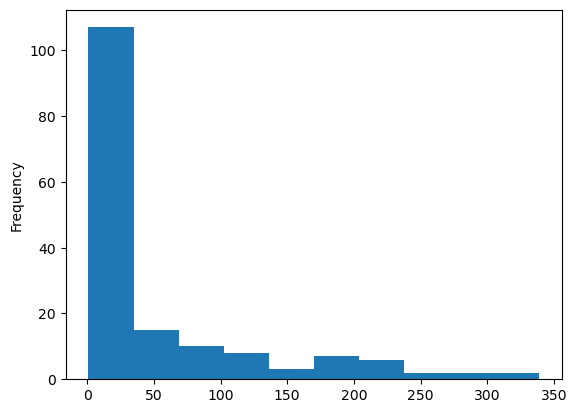

In [68]:
alcohol.plot(kind="hist")

## mode 
### is the item that appears the most --> peak of the distribution

In [69]:
alcohol.mode()

0    1.0
Name: wine_servings, dtype: float64

In [71]:
# this means that a serving of 1 is the most common in the data set

# BUT ... what is we want to know how many times 1 appears in the dataset??

alcohol.value_counts()

1.0      28
2.0      10
7.0       9
8.0       7
5.0       6
         ..
218.0     1
185.0     1
78.0      1
165.0     1
22.0      1
Name: wine_servings, Length: 71, dtype: int64

In [73]:
# so now we know that a serving of 1 shows up 28 times
# since this method is SORTED and unique values this is the only function we need to call 

In [74]:
#if we wanted to see the distribution (or % each contributes) we can us the normalize parm
alcohol.value_counts(normalize=True)

1.0      0.172840
2.0      0.061728
7.0      0.055556
8.0      0.043210
5.0      0.037037
           ...   
218.0    0.006173
185.0    0.006173
78.0     0.006173
165.0    0.006173
22.0     0.006173
Name: wine_servings, Length: 71, dtype: float64

### now we know that 1 serving occurred 28 time AND that is 17.28% of the servings